In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import datetime as dt

## About the Study
#### We are conducting this study because our city Tetouan needs to predict its electricity consumption accurately to ensure that supply meets demand. This helps to better design, implement and manage energy management and planning. This research helps the sustainability of the energy systems.


- The goal of study is:
    - To predict the energy, energy consumption in Tetouan each 10 minutes and/or every hour, the usage of various device studying algorithms. 

    - To decide which machine learning algorithm is the best for strength intake prediction in the context of Tetouan's particular electricity distribution and consumption patterns. 

In [3]:
file_path = "Tetuan City power consumption.csv"

data = pd.read_csv("Tetuan City power consumption.csv")

#### Exploring the Dataset

In [4]:
data.head(10)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


In [5]:
data.shape

(52416, 9)

In [79]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [7]:
data[data.duplicated()]

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption


> There are no null or duplicated data points.

### Convert the date_time column to a datetime datatype

In [8]:
data["DateTime"]=pd.to_datetime(data["DateTime"],format="%m/%d/%Y %H:%M")
data.head(10)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,2017-01-01 01:00:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,2017-01-01 01:10:00,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,2017-01-01 01:20:00,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,2017-01-01 01:30:00,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


### Creating Month, Day, Hour and Minutes Variable

In [9]:
data["Month"]=data["DateTime"].dt.month
data["Day"]=data["DateTime"].dt.day
data["Hour"]=data["DateTime"].dt.hour
data["Minute"]=data["DateTime"].dt.minute

data["Day of Week"] = data["DateTime"].dt.dayofweek 
data["Day of Year"] = data["DateTime"].dt.dayofyear
data["Quarter"] = data["DateTime"].dt.quarter
data["Week of Year"] = data["DateTime"].dt.isocalendar().week

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
 9   Month                      52416 non-null  int32         
 10  Day                        52416 non-null  int32         
 11  Hour                       52416 non-null  int32         
 12  Minu

## Creating new Feature as total consumption

In [10]:
data["total Power Consumption"] = data["Zone 1 Power Consumption"] + data["Zone 2  Power Consumption"] + data["Zone 3  Power Consumption"]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
 9   Month                      52416 non-null  int32         
 10  Day                        52416 non-null  int32         
 11  Hour                       52416 non-null  int32         
 12  Minu

In [12]:
data.head(10)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Month,Day,Hour,Minute,Day of Week,Day of Year,Quarter,Week of Year,total Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1,0,0,6,1,1,52,70425.53544
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1,0,10,6,1,1,52,69320.84387
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,1,0,20,6,1,1,52,67803.22193
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,1,0,30,6,1,1,52,65489.23209
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,1,0,40,6,1,1,52,63650.44627
5,2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048,1,1,0,50,6,1,1,52,62171.34398
6,2017-01-01 01:00:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024,1,1,1,0,6,1,1,52,60937.36065
7,2017-01-01 01:10:00,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711,1,1,1,10,6,1,1,52,59566.75124
8,2017-01-01 01:20:00,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217,1,1,1,20,6,1,1,52,58030.61931
9,2017-01-01 01:30:00,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687,1,1,1,30,6,1,1,52,57012.92027


## Correlation between each feature

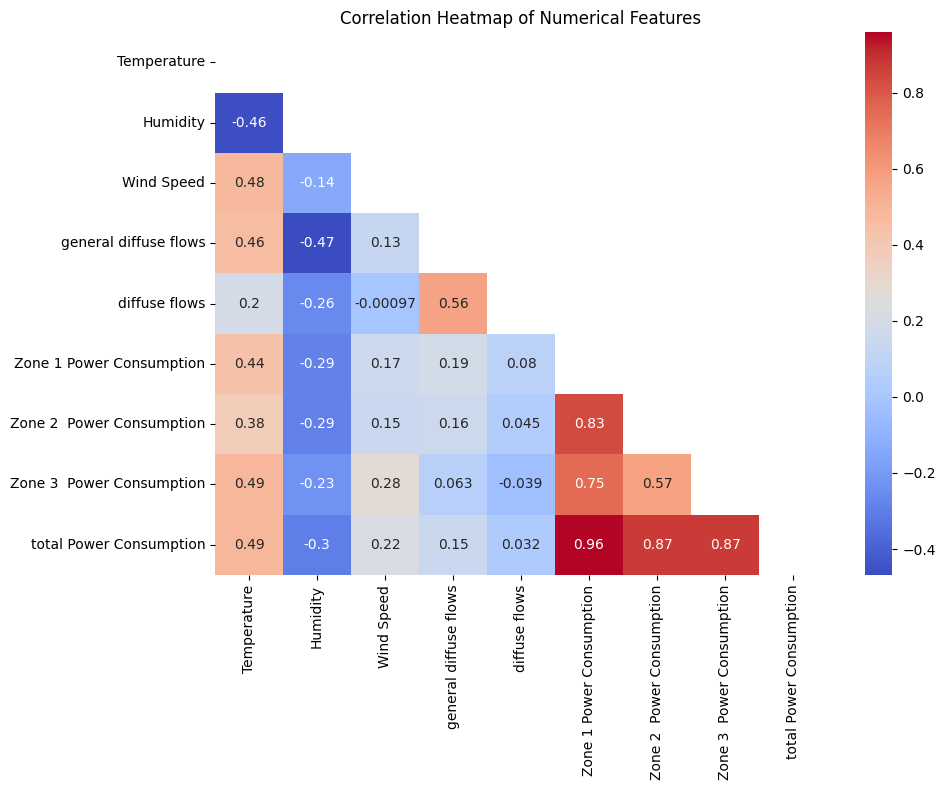

In [13]:
# Select numerical columns
nums = ["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows","Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption","total Power Consumption"]
data_nums = data.loc[:, nums]

#calculate correlation between variable
corr_mat = data_nums.corr()

#hidden upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

#plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm',mask=mask)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

> We can see that there is no correlation between each feature except for the relationship between power consumption

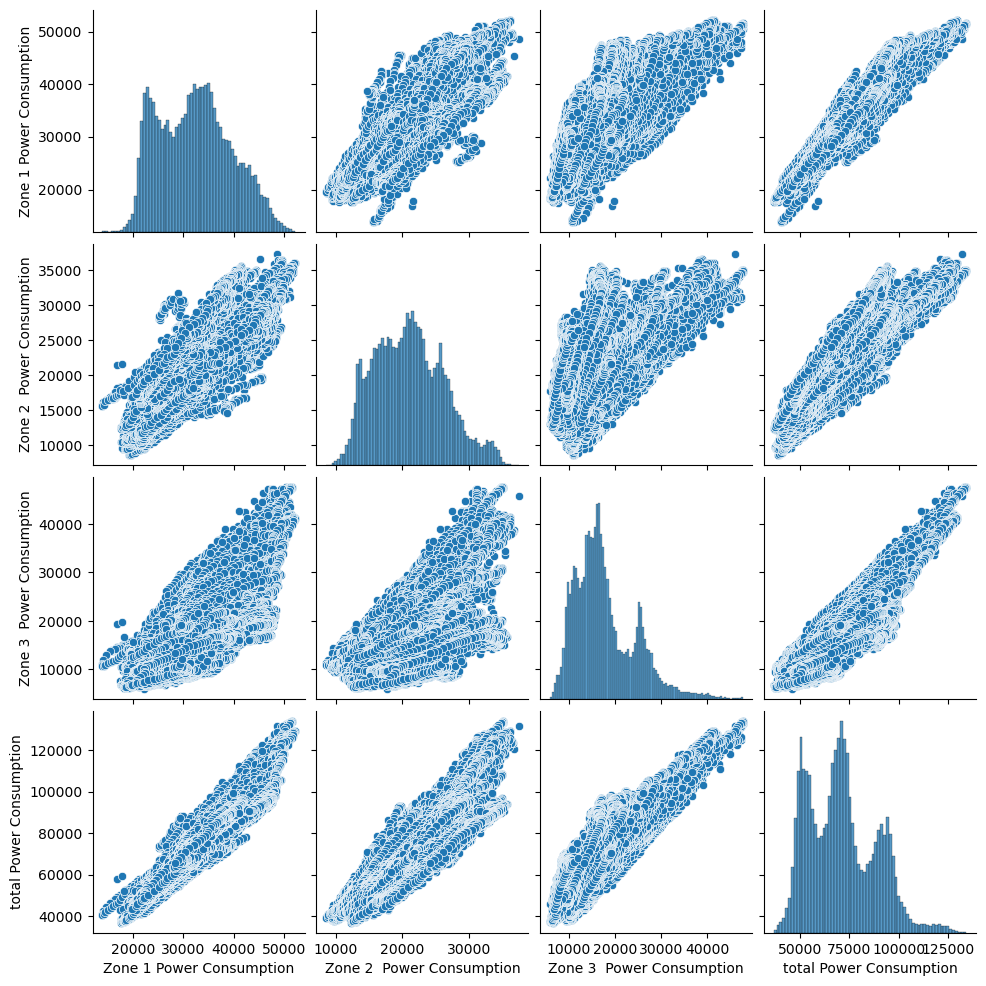

In [88]:
sns.pairplot(data=data, vars=["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption","total Power Consumption"])

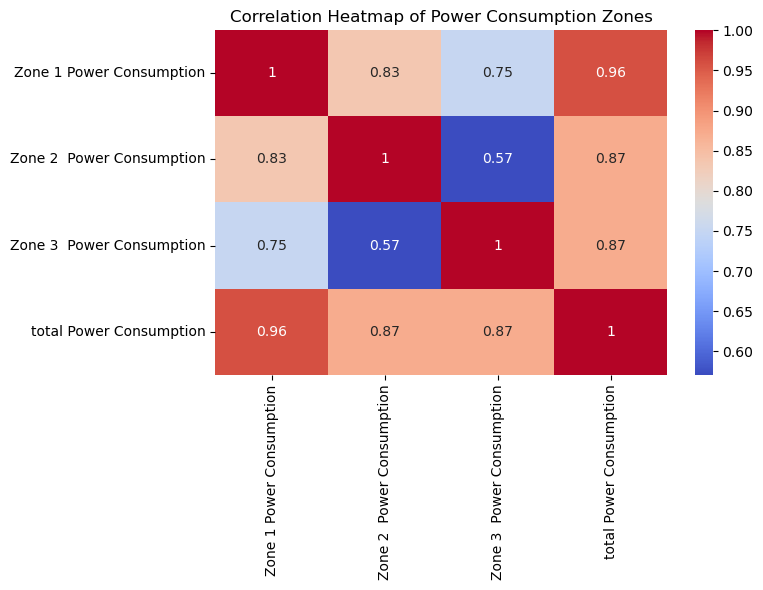

In [89]:
#selecting variable
variables_of_consumption = ["Zone 1 Power Consumption", "Zone 2  Power Consumption", 
                         "Zone 3  Power Consumption", "total Power Consumption"]

#calculate correlation between variable
corr_mat = data[variables_of_consumption].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap of Power Consumption Zones")
plt.tight_layout()
plt.show()

> From the heatmap above, we can see that there is a correlation between zones 1, 2, and 3 and total consumption. However, it has a small correlation between zones 2 and 3, which is 0.57.

## Outliers detection

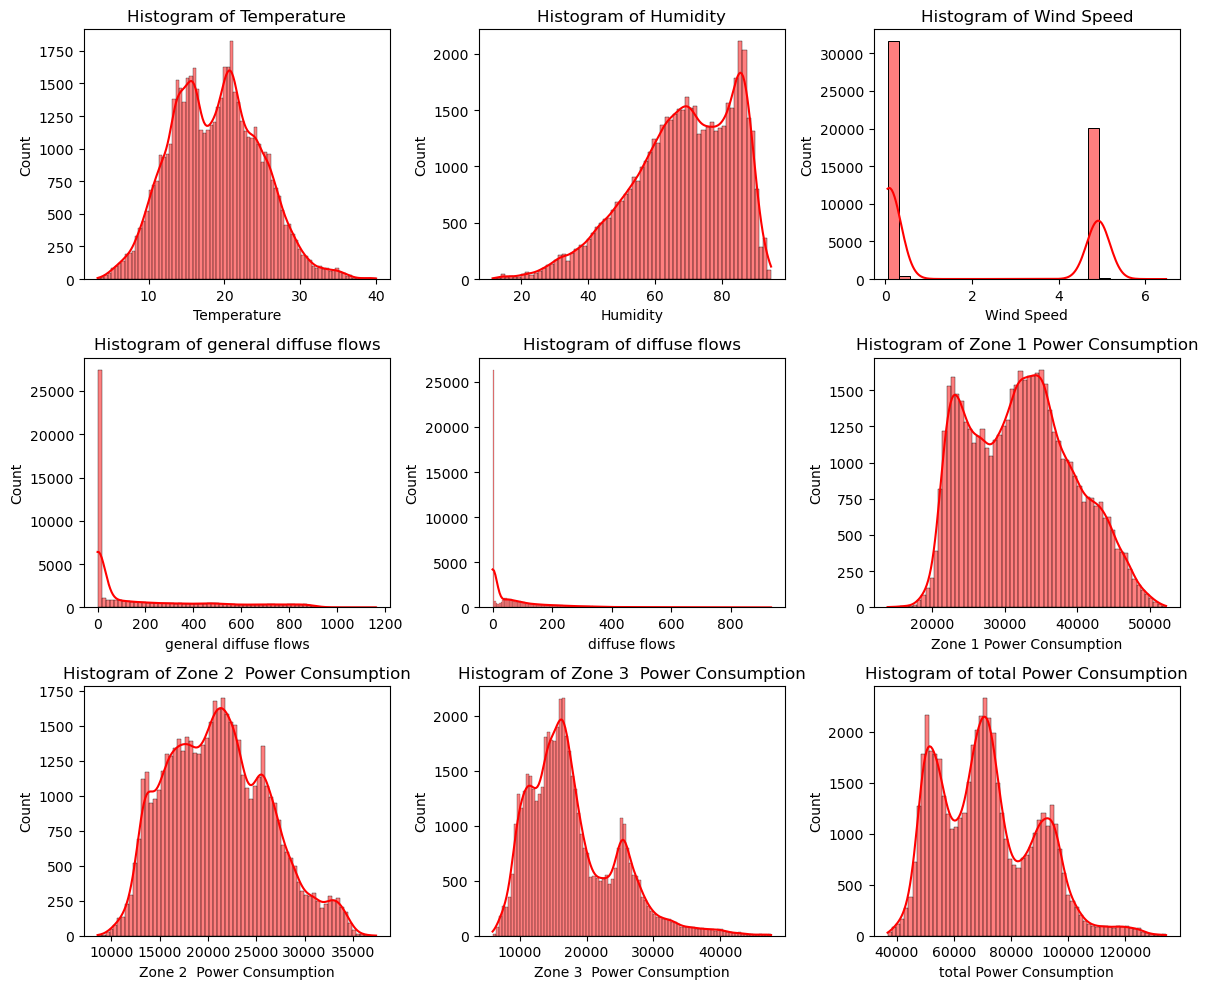

In [90]:
features = ["Temperature","Humidity","Wind Speed","general diffuse flows","diffuse flows","Zone 1 Power Consumption", "Zone 2  Power Consumption", 
                         "Zone 3  Power Consumption", "total Power Consumption"]

#make subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

axes = axes.flatten()

#create histogram
for i, var in enumerate(features):
    sns.histplot(data[var], ax=axes[i], kde=True, color='red')
    axes[i].set_title(f'Histogram of {var}')

plt.tight_layout()
plt.show()

## Power consumption in 1 year

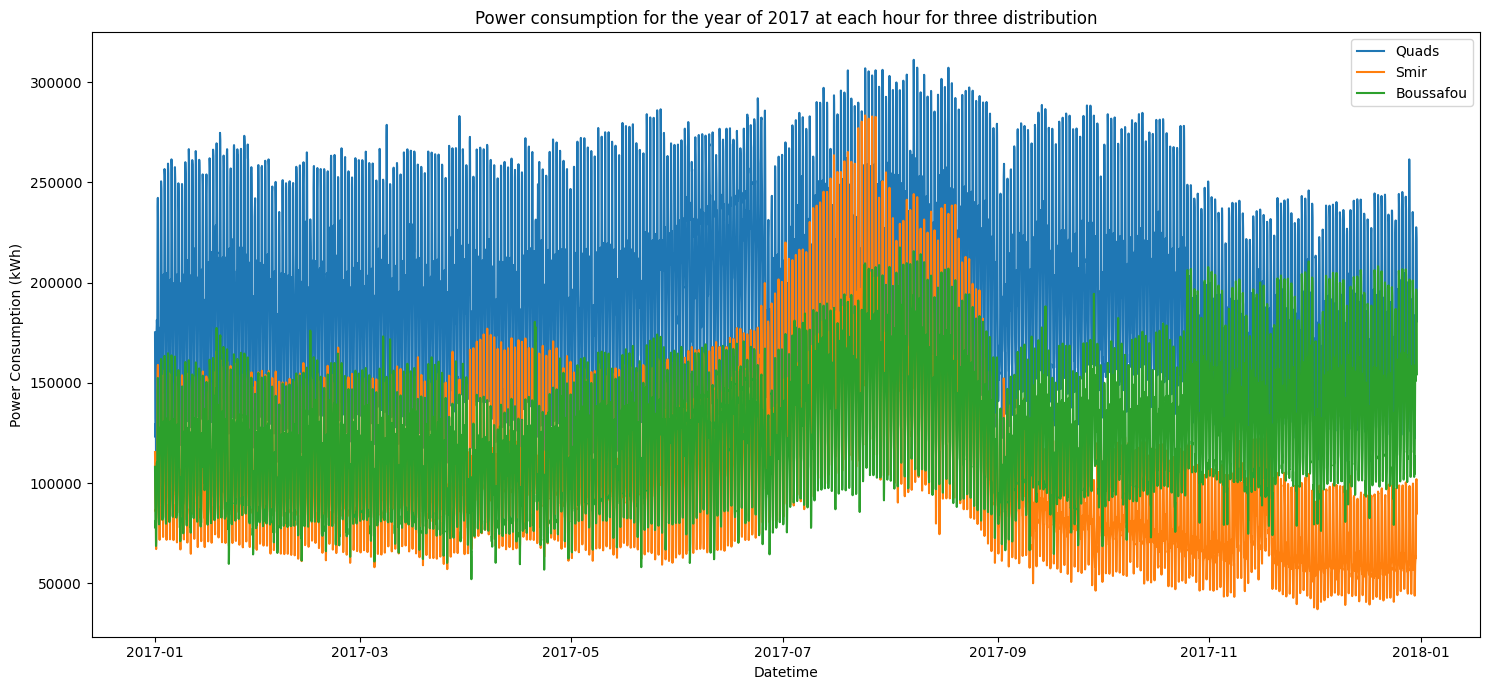

In [14]:
# Plotting
plt.figure(figsize=(15, 7))

data.set_index("DateTime", inplace=True)
hourly_data = data.resample('h').sum()

plt.plot(hourly_data.index, hourly_data["Zone 1 Power Consumption"], label='Quads', color='tab:blue')
plt.plot(hourly_data.index, hourly_data["Zone 3  Power Consumption"], label='Smir', color='tab:orange')
plt.plot(hourly_data.index, hourly_data["Zone 2  Power Consumption"], label='Boussafou', color='tab:green')

plt.legend()
plt.title('Power consumption for the year of 2017 at each hour for three distribution')
plt.ylabel('Power Consumption (kWh)')
plt.xlabel('Datetime')
plt.tight_layout()
plt.show()


#### We can observe that:
- The increase in power consumption from June to August is because of the hot weather and vacation time. However, both Quads and Smir have decreased in November and December, and the consumption of Boussafou has grown sharply in the same months.


## Variable Zone 1 Power Consumption(Quads) correlation in Datetime

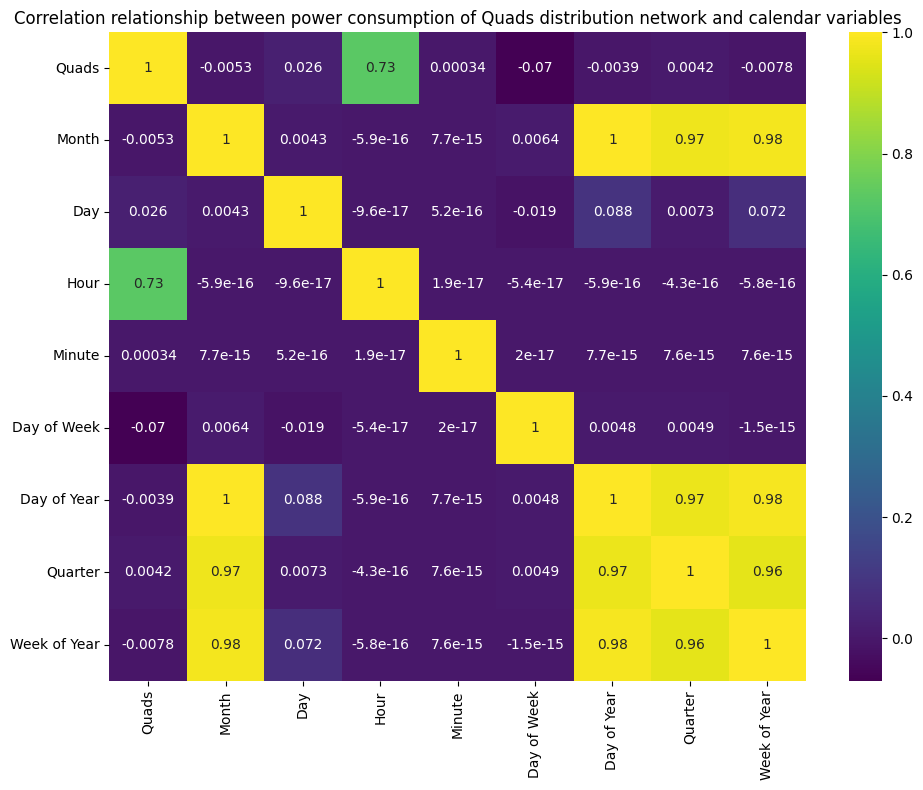

In [15]:
data.rename(columns={"Zone 1 Power Consumption": "Quads"}, inplace=True)

#relevant columns for Quads area
Quads_distribution = ["Quads", "Month", "Day", "Hour", "Minute", "Day of Week", "Day of Year", "Quarter", "Week of Year"]

#correlation matrix
corr_matrix = data[Quads_distribution].corr()

#create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

plt.title("Correlation relationship between power consumption of Quads distribution network and calendar variables")
plt.tight_layout()
plt.show()

## Quads power consumption in a day

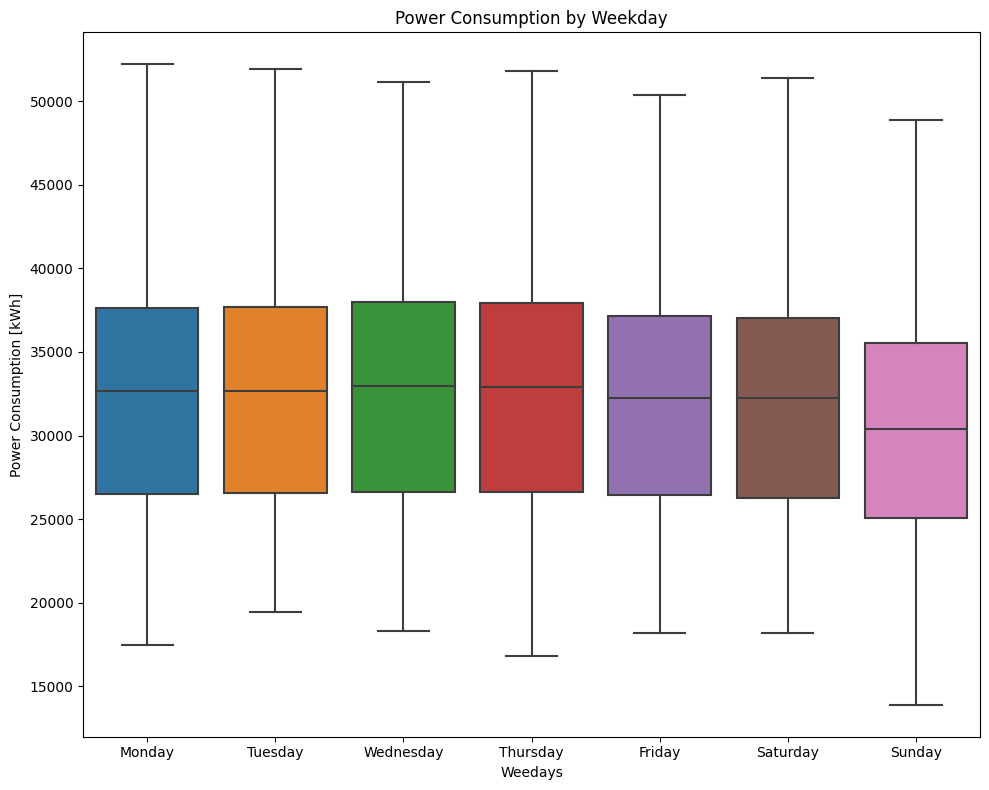

In [16]:
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x="Day of Week", y="Quads")

#change day labels
plt.xticks(range(7), weekday_names)

#make label and title
plt.xlabel("Weedays")
plt.ylabel("Power Consumption [kWh]")
plt.title("Power Consumption by Weekday")

plt.tight_layout()
# Show plot
plt.show()


#### We can observe that:
- ⁤From Monday to Thursday, people are operating inside the factory and workplace plenty, which would possibly result in an growth in power intake. ⁤⁤However, on Fridays and weekends, people are not working and stay at home, so there may be a slight decrease in electric consumption.Our dataset is aggregated statistics, and it is not determined for precise varieties of buildings to know the overall effect of working days or weekends. ⁤

## Display the weather properties and the correlation between the power consumption of Quads distribution 

In [17]:
selected_columns = ["general diffuse flows","Temperature","Humidity","Wind Speed","diffuse flows","Quads"]

desc_stats = data[selected_columns].describe()

#calculate correlation matrix
corr_matrix = data[selected_columns].corr()

#take the value in correlation coefficients with the output variable
corr_matrix = corr_matrix.iloc[:-1, -1]

#append correlation
desc_stats.loc["Correlation"] = corr_matrix

#transpose data
desc_stats_transposed = desc_stats.transpose()

print("           WEATHER PROPERTIES AND COEFFICIENT OF CORRELATION BETWEEN THE INPUT VARIABLES AND THE OUTPUT VARIABLE     ")

desc_stats_transposed

           WEATHER PROPERTIES AND COEFFICIENT OF CORRELATION BETWEEN THE INPUT VARIABLES AND THE OUTPUT VARIABLE     


,count,mean,std,min,25%,50%,75%,max,Correlation
general diffuse flows,52416.0,182.696614,264.400960,0.0040,0.062000,5.03550,319.600000,1163.00000,0.187965
Temperature,52416.0,18.810024,5.815476,3.2470,14.410000,18.78000,22.890000,40.01000,0.440221
Humidity,52416.0,68.259518,15.551177,11.3400,58.310000,69.86000,81.400000,94.80000,-0.287421
Wind Speed,52416.0,1.959489,2.348862,0.0500,0.078000,0.08600,4.915000,6.48300,0.167444
diffuse flows,52416.0,75.028022,124.210949,0.0110,0.122000,4.45600,101.000000,936.00000,0.080274
Quads,52416.0,32344.970564,7130.562564,13895.6962,26310.668692,32265.92034,37309.018185,52204.39512,NaN


> We can see that the heatmap and table above show the relationship between calendar and weather attributes, using feature selection in order to know the importance of predictive variables and remove unimportant features.

> There are many ways to perform that, including decision trees, random forests, and support vector machines, that can be used to identify the true predictor of a large number of candidates.

## Feature Selection Detection

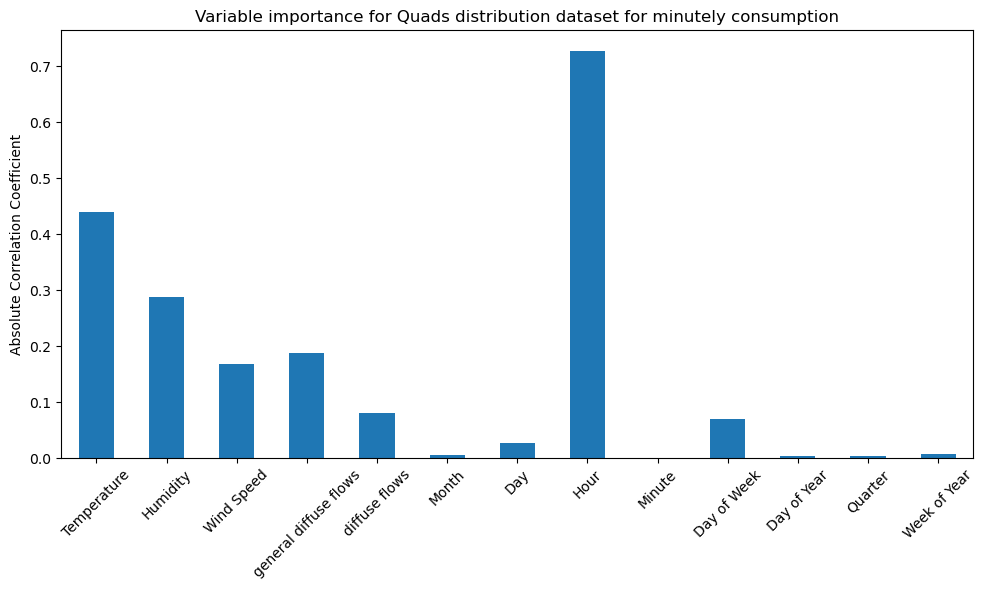

In [95]:
#calculate correlation between each column and the "Quads" column
correlation_with_quads = data.corr()["Quads"].drop(["Quads","Zone 3  Power Consumption","Zone 2  Power Consumption","total Power Consumption"])
correlation_with_quads = correlation_with_quads.abs()

#plot
plt.figure(figsize=(10, 6))
correlation_with_quads.plot(kind='bar')
plt.ylabel("Absolute Correlation Coefficient")
plt.title("Variable importance for Quads distribution dataset for minutely consumption")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Quads', 'Zone 2  Power Consumption',
       'Zone 3  Power Consumption', 'Month', 'Day', 'Hour', 'Minute',
       'Day of Week', 'Day of Year', 'Quarter', 'Week of Year',
       'total Power Consumption'],
      dtype='object')

> It is shown in the bar chart above that all variables are important except for day of year, month, quarter, and week of year. So, we will remove it in order to save memory and enhance execution time. The minute feature is less important but will be kept as we will be using it to analyse data in the future.

In [19]:
data = data.drop(["Day of Year", "Month", "Quarter", "Week of Year"], axis=1)

data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Quads', 'Zone 2  Power Consumption',
       'Zone 3  Power Consumption', 'Day', 'Hour', 'Minute', 'Day of Week',
       'total Power Consumption'],
      dtype='object')

## Building Model

### Performance metric of each model

## Quads distribution

In [20]:

x = data.drop(["Quads", "Zone 2  Power Consumption", "Zone 3  Power Consumption","total Power Consumption"], axis=1)
y = data["Quads"]

#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

preprocessor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

In [21]:
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "FFNN": MLPRegressor(random_state=42, solver='adam', max_iter=100)
}

for name, model in models.items():
    reg = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    reg.fit(x_train, y_train)
    
    #predict on train and test data
    y_train_predict = reg.predict(x_train)
    y_test_predict = reg.predict(x_test)

    # Evaluate performance on train data
    train_mae = mean_absolute_error(y_train, y_train_predict)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

    # Evaluate performance on test data
    test_mae = mean_absolute_error(y_test, y_test_predict)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

    # Print results
    print(f"Model: {name}")
    print(f"train RMSE: {train_rmse}")
    print(f"test RMSE: {test_rmse}")
    print(f"train MAE: {train_mae}")
    print(f"test MAE: {test_mae}")
    print("")


Model: RandomForest
train RMSE: 459.9581722546674
test RMSE: 1225.1435928619865
train MAE: 295.9250307046012
test MAE: 799.3900878498778

Model: DecisionTree
train RMSE: 3.1780316831582795e-14
test RMSE: 1780.9648032785128
train MAE: 2.776235353397217e-16
test MAE: 1004.771187590812

Model: SVR
train RMSE: 6054.095556258115
test RMSE: 6071.496466194653
train MAE: 4913.223246943331
test MAE: 4936.034576351444

Model: LinearRegression
train RMSE: 4332.256746975554
test RMSE: 4321.245368041863
train MAE: 3433.6139347646713
test MAE: 3419.3877838805115

Model: FFNN
train RMSE: 5218.70079601234
test RMSE: 5236.108794453843
train MAE: 4127.317328919618
test MAE: 4143.461568656687



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Smir distribution

In [69]:
data.rename(columns={"Zone 3  Power Consumption": "Smir"}, inplace=True)


In [70]:

x = data.drop(["Quads", "Zone 2  Power Consumption", "Smir","total Power Consumption"], axis=1)
y = data["Smir"]

#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

preprocessor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "FFNN": MLPRegressor(random_state=42, solver='adam', max_iter=500)
}



for name, model in models.items():
    reg = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    reg.fit(x_train, y_train)
    
    #predict on train and test data
    y_train_predict = reg.predict(x_train)
    y_test_predict = reg.predict(x_test)

    # Evaluate performance on train data
    train_mae = mean_absolute_error(y_train, y_train_predict)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

    # Evaluate performance on test data
    test_mae = mean_absolute_error(y_test, y_test_predict)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

    # Print results
    print(f"Model: {name}")
    print(f"train RMSE: {train_rmse}")
    print(f"test RMSE: {test_rmse}")
    print(f"train MAE: {train_mae}")
    print(f"test MAE: {test_mae}")
    print("")
    

Model: RandomForest
train RMSE: 493.9456199782186
test RMSE: 1350.4822174015467
train MAE: 311.391471513414
test MAE: 847.8614911526755

Model: DecisionTree
train RMSE: 0.0
test RMSE: 2023.3318283946517
train MAE: 0.0
test MAE: 950.7396927821275

Model: SVR
train RMSE: 6262.556372792761
test RMSE: 6307.972851774626
train MAE: 4572.031764500838
test MAE: 4631.130305210697

Model: LinearRegression
train RMSE: 5024.544197734694
test RMSE: 5038.804855278973
train MAE: 4080.6925641127177
test MAE: 4110.205230366383

Model: FFNN
train RMSE: 4892.012022635884
test RMSE: 4905.062881968152
train MAE: 3957.8034926265545
test MAE: 3985.854142474561



/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Boussafou distribution

In [73]:
data.rename(columns={"Zone 2  Power Consumption": "Boussafou"}, inplace=True)


In [29]:

x = data.drop(["Quads", "Boussafou", "Smir","total Power Consumption"], axis=1)
y = data["Boussafou"]

#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

preprocessor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "FFNN": MLPRegressor(random_state=42, solver='adam', max_iter=100)
}

for name, model in models.items():
    reg = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    reg.fit(x_train, y_train)
    
    #predict on train and test data
    y_train_predict = reg.predict(x_train)
    y_test_predict = reg.predict(x_test)

    # Evaluate performance on train data
    train_mae = mean_absolute_error(y_train, y_train_predict)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

    # Evaluate performance on test data
    test_mae = mean_absolute_error(y_test, y_test_predict)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

    # Print results
    print(f"Model: {name}")
    print(f"train RMSE: {train_rmse}")
    print(f"test RMSE: {test_rmse}")
    print(f"train MAE: {train_mae}")
    print(f"test MAE: {test_mae}")
    print("")

Model: RandomForest
train RMSE: 417.1007434326924
test RMSE: 1128.203777001832
train MAE: 270.20734736410924
test MAE: 734.8079109543185

Model: DecisionTree
train RMSE: 0.0
test RMSE: 1745.9339128549618
train MAE: 0.0
test MAE: 933.6232640756258

Model: SVR
train RMSE: 4400.266616945292
test RMSE: 4412.985373794915
train MAE: 3497.404328525102
test MAE: 3500.3749900596417

Model: LinearRegression
train RMSE: 3552.0394933218454
test RMSE: 3562.4511078341566
train MAE: 2806.1900820254914
test MAE: 2812.5940456832095

Model: FFNN
train RMSE: 3803.7331837777874
test RMSE: 3827.5977427906787
train MAE: 2987.0402901648004
test MAE: 3013.209796319221



/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Total 3 city distribution

In [72]:
data.rename(columns={"total Power Consumption": "Aggregated Distribution"}, inplace=True)

In [31]:
data.rename(columns={"total Power Consumption": "Aggregated Distribution"}, inplace=True)

x = data.drop(["Quads", "Boussafou", "Smir","Aggregated Distribution"], axis=1)
y = data["Aggregated Distribution"]

#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

preprocessor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "FFNN": MLPRegressor(random_state=42, solver='adam', max_iter=100)
}

# For storing predictions
predictions = {}

for name, model in models.items():
    reg = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    reg.fit(x_train, y_train)
    
    #predict on train and test data
    y_train_predict = reg.predict(x_train)
    y_test_predict = reg.predict(x_test)
    
    # Storing test predictions
    predictions[name] = y_test_predict
    
    # Evaluate performance on train data
    train_mae = mean_absolute_error(y_train, y_train_predict)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

    # Evaluate performance on test data
    test_mae = mean_absolute_error(y_test, y_test_predict)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

    # Print results
    print(f"Model: {name}")
    print(f"train RMSE: {train_rmse}")
    print(f"test RMSE: {test_rmse}")
    print(f"train MAE: {train_mae}")
    print(f"test MAE: {test_mae}")
    print("")

    

Model: RandomForest
train RMSE: 972.8156921181251
test RMSE: 2622.4617201219216
train MAE: 605.0143266899148
test MAE: 1634.3659639628875

Model: DecisionTree
train RMSE: 0.0
test RMSE: 3895.9975786069526
train MAE: 0.0
test MAE: 2074.6157494233057

Model: SVR
train RMSE: 16120.85826551416
test RMSE: 16202.877057479536
train MAE: 12770.174604260246
test MAE: 12868.734829844123

Model: LinearRegression
train RMSE: 10624.81763846602
test RMSE: 10640.635854055416
train MAE: 8346.672283190841
test MAE: 8394.136087345261

Model: FFNN
train RMSE: 15894.16105974137
test RMSE: 15956.179579642301
train MAE: 12557.635661414248
test MAE: 12635.87621330686



/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## OPTIMIZINING COMPARITIVE MODEL PARAMETERS

### Quads Distribution 

In [ ]:
# Define data
x = data.drop(["Quads", "Boussafou", "Smir", "Aggregated Distribution"], axis=1)
y = data["Quads"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Preprocessor pipeline
preprocessor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

#create model
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "FFNN": MLPRegressor(random_state=42, solver='adam', max_iter=100)
}

# Define hyperparameters grid for each model
param_grids = {
    "RandomForest": {
        "model__n_estimators": [50, 100, 150],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10]
    },
    "DecisionTree": {
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 5, 10]
    },
    "SVR": {
        "model__C": [0.1, 1, 10],
        "model__gamma": [0.01, 0.1, 1]
    },
    "LinearRegression": {},
    "FFNN": {
        "model__hidden_layer_sizes": [(50,), (100,), (150,)],
        "model__max_iter": [100, 200, 300],
        "model__learning_rate_init": [0.001, 0.01, 0.1]
    }
}

# GridSearchCV for each model
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=Pipeline(steps=[("preprocessor", preprocessor), ("model", model)]),
        param_grid=param_grids[name],
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(x_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print("")

# Evaluate best estimators
for name, estimator in best_estimators.items():
    y_train_predict = estimator.predict(x_train)
    y_test_predict = estimator.predict(x_test)
    
    
    # Evaluate performance on train data
    train_mae = mean_absolute_error(y_train, y_train_predict)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

    # Evaluate performance on test data
    test_mae = mean_absolute_error(y_test, y_test_predict)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
    
    # Print results
    print(f"Model: {name}")
    print(f"train RMSE: {train_rmse}")
    print(f"test RMSE: {test_rmse}")
    print(f"train MAE: {train_mae}")
    print(f"test MAE: {test_mae}")
    print("")
    

Best parameters for RandomForest:
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 150}

Best parameters for DecisionTree:
{'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}

Best parameters for SVR:
{'model__C': 10, 'model__gamma': 1}

Best parameters for LinearRegression:
{}



/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/n

Best parameters for FFNN:
{'model__hidden_layer_sizes': (150,), 'model__learning_rate_init': 0.01, 'model__max_iter': 300}

Model: RandomForest
train RMSE: 454.0912884167219
test RMSE: 1219.6718973738323
train MAE: 293.348740082056
test MAE: 795.5399632045277

Model: DecisionTree
train RMSE: 958.6226846939134
test RMSE: 1756.2060628932054
train MAE: 596.1809151875334
test MAE: 1090.5272165952542

Model: SVR
train RMSE: 4377.328802731917
test RMSE: 4375.377629056173
train MAE: 3396.1812370840453
test MAE: 3402.0258755772393

Model: LinearRegression
train RMSE: 4332.256746975554
test RMSE: 4321.245368041863
train MAE: 3433.6139347646704
test MAE: 3419.3877838805106

Model: FFNN
train RMSE: 4332.831363819707
test RMSE: 4322.193023343004
train MAE: 3431.9027986972615
test MAE: 3418.3100941547846



## Smir Distribution

In [74]:
# Define data
x = data.drop(["Quads", "Boussafou", "Smir", "Aggregated Distribution"], axis=1)
y = data["Smir"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Preprocessor pipeline
preprocessor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

#create model
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "FFNN": MLPRegressor(random_state=42, solver='adam', max_iter=500)
}

# Define hyperparameters grid for each model
param_grids = {
    "RandomForest": {
        "model__n_estimators": [50, 100, 150],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10]
    },
    "DecisionTree": {
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 5, 10]
    },
    "SVR": {
        "model__C": [0.1, 1, 10],
        "model__gamma": [0.01, 0.1, 1]
    },
    "LinearRegression": {},
    "FFNN": {
        "model__hidden_layer_sizes": [(50,), (100,), (150,)],
        "model__max_iter": [100, 200, 300],
        "model__learning_rate_init": [0.001, 0.01, 0.1]
    }
}

# GridSearchCV for each model
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=Pipeline(steps=[("preprocessor", preprocessor), ("model", model)]),
        param_grid=param_grids[name],
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1,
        error_score="raise" 
    )
    grid_search.fit(x_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print("")

# Evaluate best estimators
for name, estimator in best_estimators.items():
    y_train_predict = estimator.predict(x_train)
    y_test_predict = estimator.predict(x_test)
    
    
    # Evaluate performance on train data
    train_mae = mean_absolute_error(y_train, y_train_predict)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

    # Evaluate performance on test data
    test_mae = mean_absolute_error(y_test, y_test_predict)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
    
    # Print results
    print(f"Model: {name}")
    print(f"train RMSE: {train_rmse}")
    print(f"test RMSE: {test_rmse}")
    print(f"train MAE: {train_mae}")
    print(f"test MAE: {test_mae}")
    print("")
    

Best parameters for RandomForest:
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 150}

Best parameters for DecisionTree:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}

Best parameters for SVR:
{'model__C': 10, 'model__gamma': 1}

Best parameters for LinearRegression:
{}



/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/n

Best parameters for FFNN:
{'model__hidden_layer_sizes': (100,), 'model__learning_rate_init': 0.1, 'model__max_iter': 100}

Model: RandomForest
train RMSE: 490.0185387621476
test RMSE: 1351.4350527447552
train MAE: 309.3227984797974
test MAE: 848.2972362192359

Model: DecisionTree
train RMSE: 422.1978832947563
test RMSE: 2005.050994985768
train MAE: 172.74037979494386
test MAE: 968.3925972640542

Model: SVR
train RMSE: 5265.402093329159
test RMSE: 5301.906852774738
train MAE: 3953.4269998155846
test MAE: 3996.343123446358

Model: LinearRegression
train RMSE: 5024.544197734694
test RMSE: 5038.804855278973
train MAE: 4080.6925641127177
test MAE: 4110.205230366383

Model: FFNN
train RMSE: 4036.249629443996
test RMSE: 4047.3917640086747
train MAE: 3177.278198524492
test MAE: 3186.5855779417593



## Boussafou Distribution

In [ ]:
# Define data
x = data.drop(["Quads", "Boussafou", "Smir", "Aggregated Distribution"], axis=1)
y = data["Boussafou"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Preprocessor pipeline
preprocessor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

#create model
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "FFNN": MLPRegressor(random_state=42, solver='adam', max_iter=100)
}

#define hyperparameters grid for each model
param_grids = {
    "RandomForest": {
        "model__n_estimators": [50, 100, 150],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10]
    },
    "DecisionTree": {
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 5, 10]
    },
    "SVR": {
        "model__C": [0.1, 1, 10],
        "model__gamma": [0.01, 0.1, 1]
    },
    "LinearRegression": {},
    "FFNN": {
        "model__hidden_layer_sizes": [(50,), (100,), (150,)],
        "model__max_iter": [100, 200, 300],
        "model__learning_rate_init": [0.001, 0.01, 0.1]
    }
}

# GridSearchCV for each model
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=Pipeline(steps=[("preprocessor", preprocessor), ("model", model)]),
        param_grid=param_grids[name],
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1,
        error_score="raise" 
    )
    grid_search.fit(x_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print("")

# Evaluate best estimators
for name, estimator in best_estimators.items():
    y_train_predict = estimator.predict(x_train)
    y_test_predict = estimator.predict(x_test)
    
    
    #evaluate performance on train data
    train_mae = mean_absolute_error(y_train, y_train_predict)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

    #evaluate performance on test data
    test_mae = mean_absolute_error(y_test, y_test_predict)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
    
    #display output
    print(f"Model: {name}")
    print(f"train RMSE: {train_rmse}")
    print(f"test RMSE: {test_rmse}")
    print(f"train MAE: {train_mae}")
    print(f"test MAE: {test_mae}")
    print("")
    

Best parameters for RandomForest:
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 150}

Best parameters for DecisionTree:
{'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}

Best parameters for SVR:
{'model__C': 10, 'model__gamma': 1}

Best parameters for LinearRegression:
{}



/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/n

Best parameters for FFNN:
{'model__hidden_layer_sizes': (150,), 'model__learning_rate_init': 0.01, 'model__max_iter': 300}

Model: RandomForest
train RMSE: 411.9977794217268
test RMSE: 1125.6163088235091
train MAE: 267.66661181344864
test MAE: 733.3020333345975

Model: DecisionTree
train RMSE: 926.3912495790742
test RMSE: 1708.2431076540115
train MAE: 565.9527692268417
test MAE: 1040.5094143706322

Model: SVR
train RMSE: 3488.040858903057
test RMSE: 3496.4154688657904
train MAE: 2722.664221753634
test MAE: 2726.1634966081688

Model: LinearRegression
train RMSE: 3552.0394933218454
test RMSE: 3562.4511078341566
train MAE: 2806.1900820254914
test MAE: 2812.5940456832095

Model: FFNN
train RMSE: 3552.0706151194368
test RMSE: 3562.2815521687785
train MAE: 2806.424077907474
test MAE: 2812.680211115369



## Aggregated Distribution

In [37]:
# Define data
x = data.drop(["Quads", "Boussafou", "Smir", "Aggregated Distribution"], axis=1)
y = data["Aggregated Distribution"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Preprocessor pipeline
preprocessor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

#create model
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "FFNN": MLPRegressor(random_state=42, solver='adam', max_iter=100)
}

#define hyperparameters grid for each model\\

# Num of features = 3, min samples split = 2, Num of Trees = 50, max depth of the tree = None, min sample leaf = 1

param_grids = {
    "RandomForest": {
        "model__n_estimators": [50, 100, 150],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10]
    },
    "DecisionTree": {
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 5, 10]
    },
    "SVR": {
        "model__C": [0.1, 1, 10],
        "model__gamma": [0.01, 0.1, 1]
    },
    "LinearRegression": {},
    "FFNN": {
        "model__hidden_layer_sizes": [(50,), (100,), (150,)],
        "model__max_iter": [100, 200, 300],
        "model__learning_rate_init": [0.001, 0.01, 0.1]
    }
}

#GridSearchCV for each model
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=Pipeline(steps=[("preprocessor", preprocessor), ("model", model)]),
        param_grid=param_grids[name],
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1,
        error_score="raise" 
    )
    grid_search.fit(x_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}:")
    print(grid_search.best_params_)
    print("")

#evaluate best estimators
for name, estimator in best_estimators.items():
    y_train_predict = estimator.predict(x_train)
    y_test_predict = estimator.predict(x_test)
    
    
    #evaluate performance on train data
    train_mae = mean_absolute_error(y_train, y_train_predict)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))

    #evaluate performance on test data
    test_mae = mean_absolute_error(y_test, y_test_predict)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
    
    #display output
    print(f"Model: {name}")
    print(f"train RMSE: {train_rmse}")
    print(f"test RMSE: {test_rmse}")
    print(f"train MAE: {train_mae}")
    print(f"test MAE: {test_mae}")
    print("")
    

Best parameters for RandomForest:
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 150}

Best parameters for DecisionTree:
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}

Best parameters for SVR:
{'model__C': 10, 'model__gamma': 1}

Best parameters for LinearRegression:
{}



/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nguyenbui/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/n

Best parameters for FFNN:
{'model__hidden_layer_sizes': (150,), 'model__learning_rate_init': 0.01, 'model__max_iter': 300}

Model: RandomForest
train RMSE: 960.8407721828165
test RMSE: 2623.969988167395
train MAE: 600.4355151468698
test MAE: 1635.103300150769

Model: DecisionTree
train RMSE: 1772.745008133291
test RMSE: 3939.234966032845
train MAE: 1050.7729002159497
test MAE: 2243.8938835056515

Model: SVR
train RMSE: 12324.4693667474
test RMSE: 12388.381823290616
train MAE: 9329.49671473441
test MAE: 9425.260330292762

Model: LinearRegression
train RMSE: 10624.81763846602
test RMSE: 10640.635854055416
train MAE: 8346.672283190841
test MAE: 8394.136087345261

Model: FFNN
train RMSE: 10625.304424999049
test RMSE: 10642.655967403138
train MAE: 8342.431422852824
test MAE: 8391.25854413532

